In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

rand_st = 42

%matplotlib inline

In [2]:
titanik = pd.read_csv('train.csv', sep=',',index_col=0)

titanik.head(4)
#titanik.columns

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
# split to X, and y
X = titanik.iloc[:,1:]
y = titanik['Survived']

In [4]:
# split data to train and test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state= 42)

In [5]:
X_train.head(2)
X_train = X_train[['Pclass',"Fare","SibSp","Parch","Age","Sex"]]
X_valid = X_valid[['Pclass',"Fare","SibSp","Parch","Age","Sex"]]

In [6]:
X_train['Age'].fillna(value=X_train['Age'].mean(), inplace=True)
X_train.shape
X_valid['Age'].fillna(value=X_valid['Age'].mean(), inplace=True)
X_valid.shape

(179, 6)

In [7]:
X_train['female'] = X_train['Sex'].replace({'male': 0.0, 'female': 1.0})
del X_train['Sex']
X_valid['female'] = X_valid['Sex'].replace({'male': 0.0, 'female': 1.0})
del X_valid['Sex']

In [8]:
X_train.isna().sum()

Pclass    0
Fare      0
SibSp     0
Parch     0
Age       0
female    0
dtype: int64

In [9]:
# Chack the title of the names to have an understanding of their age
#title = titanik["Name"].str.split(" ", n = 7, expand = True)[1]
#type(title)
#title.unique()

# Random Forest Model in Sklearn no special Feauture Engineering

In [10]:
RF_model = RandomForestClassifier(n_estimators=100, max_depth=4)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [11]:
importance = RF_model.feature_importances_

In [12]:
list(zip(importance,X_train.columns))

[(0.1591890835158184, 'Pclass'),
 (0.1789359837022176, 'Fare'),
 (0.04649695833620261, 'SibSp'),
 (0.0353885379955391, 'Parch'),
 (0.09908307316011644, 'Age'),
 (0.48090636329010594, 'female')]

In [13]:
X_train

,Pclass,Fare,SibSp,Parch,Age,female
PassengerId,,,,,,
332,1,28.5000,0,0,45.500000,0.0
734,2,13.0000,0,0,23.000000,0.0
383,3,7.9250,0,0,32.000000,0.0
705,3,7.8542,1,0,26.000000,0.0
814,3,31.2750,4,2,6.000000,1.0
...,...,...,...,...,...,...
107,3,7.6500,0,0,21.000000,1.0
271,1,31.0000,0,0,29.498846,0.0
861,3,14.1083,2,0,41.000000,0.0


<AxesSubplot:xlabel='Age', ylabel='SibSp'>

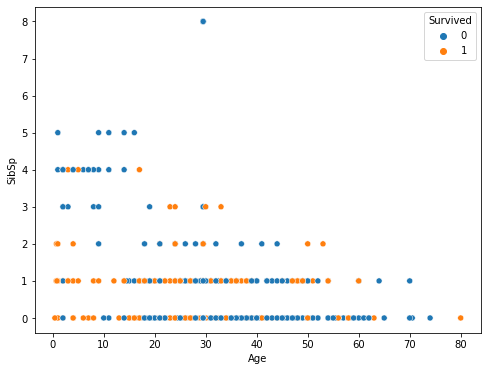

In [14]:
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.scatterplot(x=X_train['Age'],y=X_train['SibSp'],hue = y_train)


In [15]:
train_accuracy = RF_model.score(X_train, y_train)
train_accuracy

0.8497191011235955

In [16]:
val_accuracy = RF_model.score(X_valid, y_valid)
val_accuracy

0.8044692737430168

## Feature Engineering

In [17]:
# Make the column with the classes binary 
# Creating "feature matrix"
cols = X_train[['Pclass','SibSp']]
cols.head()
# cols.shape
# transform a categorical column
ohc_num = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiating the model
ohc_num.fit(cols)            # learn the classes
t_ohc = ohc_num.transform(cols)  # result is a numpy array

# t.shape

# format output as a DataFame
OHE_num = pd.DataFrame(t_ohc, columns=ohc_num.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_num.tail()
#OHE_num.rename({'x0_1': 'Class_1','x0_2': 'Class_2','x0_3': 'Class_3'}, axis='columns',inplace=True)

,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
707,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
708,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
709,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
711,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# 1. Bin the AGE list !
k_bins = KBinsDiscretizer(n_bins=4, encode='onehot', strategy='quantile')

# 2. fit with the training data (some columns of it)
k_bins.fit(X_train[['Age']])

# 3. transform the training data
bins = k_bins.transform(X_train[['Age']])
bins = pd.DataFrame(bins.todense(),columns=k_bins.get_feature_names_out())  # materializes a sparse matrix so that we can see it
# ALWAYS DO THIS UNLESS YOUR DATA SET IS REALLY BIG
bins.tail(2)
#bins.rename({bins.columns[0]: 'age_0',bins.columns[1]: 'age_1',bins.columns[2]: 'age_2',bins.columns[3]: 'age_3',bins.columns[4]: 'age_4'}, axis='columns',inplace=True)

,Age_0.0,Age_1.0,Age_2.0,Age_3.0
710,1.0,0.0,0.0,0.0
711,1.0,0.0,0.0,0.0


In [19]:
#fare_scaled.head()
minmax= X_train[['Parch',"Age","Fare"]]
minmax.head()
# cols.shape

#%% transform a numerical column
scaler_parch = MinMaxScaler()
          
scaler_parch.fit(minmax)  # learn the min and max of the data
mm_num = scaler_parch.transform(minmax)   # apply the transformation to the data
#%% format output as a DataFame
num_scaled = pd.DataFrame(mm_num, columns=minmax.columns)
num_scaled.head()


,Parch,Age,Fare
0,0.000000,0.566474,0.055628
1,0.000000,0.283740,0.025374
2,0.000000,0.396833,0.015469
3,0.000000,0.321438,0.015330
4,0.333333,0.070118,0.061045


In [20]:
#titanik_train.reset_index(inplace=True)
unmodified = X_train[['female']]
# Change the binning of the problematic unmodified indexes
unmodified.index = OHE_num.index

In [21]:
# Concatenate all the separate frames into one final after all have gone through Engineering
X_train = pd.concat([ OHE_num, num_scaled,bins,unmodified], axis=1) 

In [22]:
# Add misssing features in specified position in column
X_train.insert(9, 'SibSp_6', 0.0)
X_train.insert(10, 'SibSp_7', 0.0)
X_train


,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_6,SibSp_7,SibSp_8,Parch,Age,Fare,Age_0.0,Age_1.0,Age_2.0,Age_3.0,female
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.566474,0.055628,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.283740,0.025374,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.396833,0.015469,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.321438,0.015330,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.070118,0.061045,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.258608,0.014932,1.0,0.0,0.0,0.0,1.0
708,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.365404,0.060508,0.0,0.0,1.0,0.0,0.0
709,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.509927,0.027538,0.0,0.0,0.0,1.0,0.0
710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.170646,0.234224,1.0,0.0,0.0,0.0,1.0


# Before I try to predict I got to do the feauture enineering for the valide data

In [23]:

cols_validation = X_valid[['Pclass','SibSp']]
t_num = ohc_num.transform(cols_validation)  # result is a numpy array
OHE_t = pd.DataFrame(t_num, columns=ohc_num.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3


###################
bins = k_bins.transform(X_valid[['Age']])
bins = pd.DataFrame(bins.todense(),columns=k_bins.get_feature_names_out())  # materializes a sparse matrix so that we can see it



###################
cols = X_valid[['Parch',"Age","Fare"]]
t_fare = scaler_parch.transform(cols)     # apply the transformation to the data
fare_scaled_t = pd.DataFrame(t_fare, columns=cols.columns)

###################

unmodified_t = X_valid[['female']]
unmodified_t.index = OHE_t.index
 ########
 #Concatenate
X_valid = pd.concat([OHE_t,fare_scaled_t, bins,unmodified_t], axis=1)



In [24]:
# Add misssing features in specified position in column
X_valid.insert(9, 'SibSp_6', 0.0)
X_valid.insert(10, 'SibSp_7', 0.0)


# Random Forest Model in Sklearn that will do all the hard work for us!

In [25]:
RF_model_FE = RandomForestClassifier(n_estimators=10, max_depth=2)
RF_model_FE.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [26]:
importance = RF_model_FE.feature_importances_

In [27]:
list(zip(importance,X_train.columns))

[(0.008841142207759119, 'Pclass_1'),
 (0.0, 'Pclass_2'),
 (0.34963240604659485, 'Pclass_3'),
 (0.0, 'SibSp_0'),
 (0.04476082422921004, 'SibSp_1'),
 (0.0, 'SibSp_2'),
 (0.0, 'SibSp_3'),
 (0.0, 'SibSp_4'),
 (0.0, 'SibSp_5'),
 (0.0, 'SibSp_6'),
 (0.0, 'SibSp_7'),
 (0.0, 'SibSp_8'),
 (0.020414374965599974, 'Parch'),
 (0.10518439262181978, 'Age'),
 (0.0710389862504425, 'Fare'),
 (0.0022175383946891297, 'Age_0.0'),
 (0.0, 'Age_1.0'),
 (0.0, 'Age_2.0'),
 (0.0, 'Age_3.0'),
 (0.3979103352838847, 'female')]

In [29]:
X_train.head(2)

,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_6,SibSp_7,SibSp_8,Parch,Age,Fare,Age_0.0,Age_1.0,Age_2.0,Age_3.0,female
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566474,0.055628,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283740,0.025374,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Age', ylabel='female'>

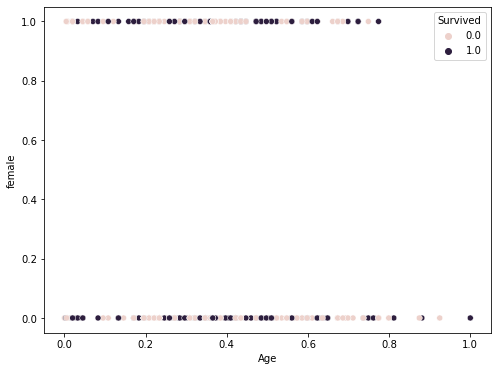

In [32]:
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.scatterplot(x=X_train['Age'],y=X_train['female'],hue = y_train)


In [34]:
test_accuracy_RF = RF_model_FE.score(X_valid, y_valid)
test_accuracy_RF

0.770949720670391

## 4. Test for Overfitting and Underfitting

In [35]:
ypred = RF_model_FE.predict(X_valid) 
accuracy_score(y_valid,ypred) 

0.770949720670391

no overfitting here since train and test are very close

no underfitting here since the accuracy score is pretty high

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

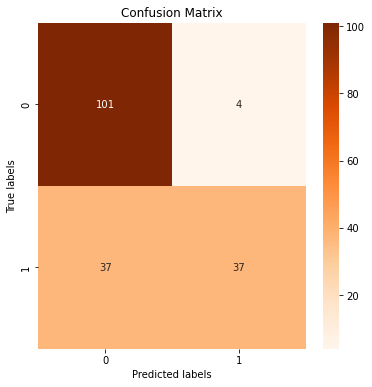

In [36]:
conf = confusion_matrix(y_valid,ypred)
conf
#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, fmt='g', cmap = 'Oranges')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


Seems a balanced result

## 7. Receiver Operator Curve and Area Under the Curve.

In [37]:
probs = RF_model_FE.predict_proba(X_valid) 
fpr, tpr, threshold = roc_curve(y_valid, probs[:,1])

Area under the curve =  0.8736164736164737


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


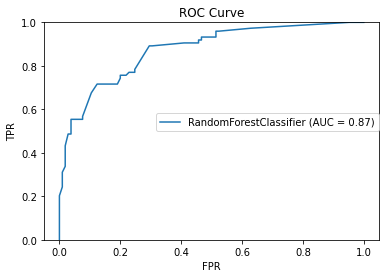

In [38]:
# Calculating area under the curve
auc_score = auc(fpr, tpr)
print("Area under the curve = ",auc_score)

plot_roc_curve(RF_model_FE, X_valid, y_valid)  
plt.title("ROC Curve")

plt.ylabel("TPR")
plt.xlabel("FPR")
plt.ylim([0,1.00])

plt.legend( loc='lower right', bbox_to_anchor=(1, 0.5),borderaxespad=0)

## 8. Precision Recall Curve

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


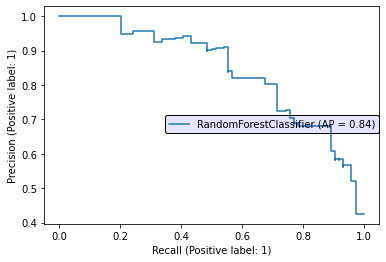

In [39]:
# plot precision and recall curve 
plot_precision_recall_curve(RF_model_FE, X_valid, y_valid)
precisions, recalls, thresholds = precision_recall_curve(y_valid, probs[:,1])

legend = plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5),borderaxespad=0,edgecolor="black")
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 1, 0.1))

In [40]:
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

0.8480847816520585

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  """


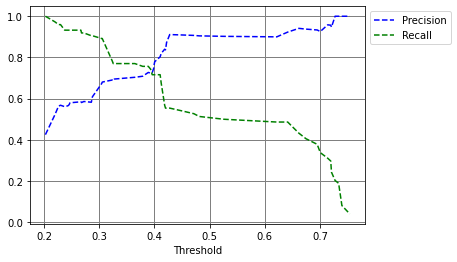

In [41]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()

# Final result

# calculate the accuracy

In [44]:
train_accuracy_FE = RF_model_FE.score(X_train, y_train)
train_accuracy_FE

0.8033707865168539

In [46]:
test_accuracy_FE = RF_model_FE.score(X_valid, y_valid)
test_accuracy_FE

0.770949720670391

# Upload to Kaggle



In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
titanik_test = test

In [ ]:
titanik_test['female'] = titanik_test['Sex'].replace({'male': 0.0, 'female': 1.0})
del titanik_test['Sex']

titanik_test['Age'].fillna(value=titanik_test['Age'].mean(), inplace=True)
titanik_test['Fare'].fillna(value=titanik_test['Fare'].mean(), inplace=True)
#################


titanik_test['Cabin'] = titanik_test['Cabin'].astype(str).str[0]

###############

cols_validation = titanik_test[['Pclass','SibSp','Cabin']]
num_test = ohc_num.transform(cols_validation)  # result is a numpy array
OHE_test = pd.DataFrame(num_test, columns=ohc_num.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3


###################
bins_test = k_bins.transform(titanik_test[['Age']])
bins_test = pd.DataFrame(bins_test.todense(),columns=k_bins.get_feature_names_out())  # materializes a sparse matrix so that we can see it



###################
cols = titanik_test[['Parch',"Age","Fare"]]
t_fare = scaler_parch.transform(cols)     # apply the transformation to the data
scaled_test = pd.DataFrame(t_fare, columns=cols.columns)

###################

unmodified_test = titanik_test[['female']]
unmodified_test.index = OHE_test.index
 ########
 #Concatenate
titanik_test = pd.concat([OHE_test, scaled_test, bins_test,unmodified_test], axis=1)


In [ ]:
# Add misssing features in specified position in column
titanik_test.insert(9, 'SibSp_6', 0.0)
titanik_test.insert(10, 'SibSp_7', 0.0)

In [ ]:
#Chenck for NaN or missing numbers
titanik_test.isnull().sum()

In [ ]:
y_test_prediction = m.predict(titanik_test) 

In [ ]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_test_prediction})

#Visualize the first 5 rows
submission

In [ ]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic_Predictions_1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
titanik_test = test

In [ ]:
del titanik_test['Ticket']
del titanik_test['Name']
del titanik_test['Embarked']

In [ ]:
titanik_test['female'] = titanik_test['Sex'].replace({'male': 0.0, 'female': 1.0})
del titanik_test['Sex']

titanik_test['Age'].fillna(value=titanik_test['Age'].mean(), inplace=True)
titanik_test['Fare'].fillna(value=titanik_test['Fare'].mean(), inplace=True)
#################


titanik_test['Cabin'] = titanik_test['Cabin'].astype(str).str[0]

###############

cols_validation = titanik_test[['Pclass','SibSp','Cabin']]
num_test = ohc_num.transform(cols_validation)  # result is a numpy array
OHE_test = pd.DataFrame(num_test, columns=ohc_num.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3


###################
bins_test = k_bins.transform(titanik_test[['Age']])
bins_test = pd.DataFrame(bins_test.todense(),columns=k_bins.get_feature_names_out())  # materializes a sparse matrix so that we can see it



###################
cols = titanik_test[['Parch',"Age","Fare"]]
t_fare = scaler_parch.transform(cols)     # apply the transformation to the data
scaled_test = pd.DataFrame(t_fare, columns=cols.columns)

###################

unmodified_test = titanik_test[['female']]
unmodified_test.index = OHE_test.index
 ########
 #Concatenate
titanik_test = pd.concat([OHE_test, scaled_test, bins_test,unmodified_test], axis=1)


In [ ]:
# Add misssing features in specified position in column
titanik_test.insert(9, 'SibSp_6', 0.0)
titanik_test.insert(10, 'SibSp_7', 0.0)

In [ ]:
#Chenck for NaN or missing numbers
titanik_test.isnull().sum()

In [ ]:
y_test_prediction = m.predict(titanik_test) 

In [ ]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_test_prediction})

#Visualize the first 5 rows
submission

In [ ]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic_Predictions_1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)